In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class projectile_linear_resistance:
    
    """
    A class that provides discrete data for components of velocity and displacement;
    which can then be plotted
    """
    
    def __init__(self, projection_angle, angle_units, 
                 
                 init_x_displacement, init_y_displacement, length_units,
                 
                 init_velocity, velocity_units, gravitational_acc, acceleration_units,
                 
                 drag_coefficient, drag_coeff_units, mass, mass_units, 
                 
                 time_units):
        
        '''
        Constants for unit conversion...
        '''
        
        KM_TO_M = 1000
        M_TO_KM = 1/1000
        
        SEC_TO_MIN = 1/60
        MIN_TO_HR = 1/60
        SEC_TO_HR = SEC_TO_MIN * MIN_TO_HR
        
        HR_TO_MIN = 60
        MIN_TO_SEC = 60
        HR_TO_SEC  = HR_TO_MIN * MIN_TO_SEC
        
        '''
        Converting angle units to radians... numpy supports radians
        '''
        
        self.angle_units = angle_units
        if self.angle_units == 'Radians':
            self.projection_angle = projection_angle 
        if self.angle_units == 'Degrees':
            self.projection_angle = projection_angle * np.pi / 180
            
        '''
        initialising length units requested and initital displacement components...
        '''
            
        self.length_units = length_units
        self.init_x_displacement = init_x_displacement
        self.init_y_displacement = init_y_displacement
        
        '''
        initialising mass units requested and mass component...
        '''
            
        self.mass_units = mass_units
        self.mass = mass
        
        '''
        intialising drag_coefficient in the mass units requested...
        '''
        self.drag_coefficient = drag_coefficient
        
        if drag_coeff_units[0] == 'Kilograms' and mass_units == 'Grams':
            self.drag_coefficient *= 1000
        if drag_coeff_units[0] == 'Grams' and mass_units == 'Kilograms':
            self.drag_coefficient *= 1/1000
            
        '''
        initialising velocity_units and init_velocity...
        '''
        
        self.velocity_units = velocity_units
        self.init_velocity = init_velocity
        
        '''
        initalising acceleration_units and gravitational_acc...
        '''
        
        self.acceleration_units = acceleration_units
        self.gravitational_acc = gravitational_acc
        
        '''
        initialising new attribute 'gravitational_acc_in_vel_units' so that the component velocity arrays
        can be computed in the velocity units requested...
        '''
        
        self.gravitational_acc_in_vel_units = self.gravitational_acc
        
        
        if acceleration_units[0] == 'Kilometres' and velocity_units[0] == 'Metres':
                self.gravitational_acc_in_vel_units *= 1000
        if acceleration_units[0] == 'Metres' and velocity_units[0] == 'Kilometres':
                self.gravitational_acc_in_vel_units *= 1/1000
                
        if acceleration_units[1] == 'Hours' and velocity_units[1] == 'Seconds':
            self.gravitational_acc_in_vel_units *= 1/3600
        if acceleration_units[1] == 'Hours' and velocity_units[1] == 'Minutes':
                self.gravitational_acc_in_vel_units *= 1/60
        if acceleration_units[1] == 'Minutes' and velocity_units[1] == 'Seconds':
                self.gravitational_acc_in_vel_units *= 1/60
                
        if acceleration_units[1] == 'Seconds' and velocity_units[1] == 'Hours':
                self.gravitational_acc_in_vel_units *= 3600
        if acceleration_units[1] == 'Seconds' and velocity_units[1] == 'Minutes':
                self.gravitational_acc_in_vel_units *= 60
        if acceleration_units[1] == 'Minutes' and velocity_units[1] == 'Hours':
                self.gravitational_acc_in_vel_units *= 60
                
        if acceleration_units[2] == 'Hours' and velocity_units[1] == 'Seconds':
            self.gravitational_acc_in_vel_units *= 1/3600
        if acceleration_units[2] == 'Hours' and velocity_units[1] == 'Minutes':
                self.gravitational_acc_in_vel_units *= 1/60
        if acceleration_units[2] == 'Minutes' and velocity_units[1] == 'Seconds':
                self.gravitational_acc_in_vel_units *= 1/60
                
        if acceleration_units[2] == 'Seconds' and velocity_units[1] == 'Hours':
                self.gravitational_acc_in_vel_units *= 3600
        if acceleration_units[2] == 'Seconds' and velocity_units[1] == 'Minutes':
                self.gravitational_acc_in_vel_units *= 60
        if acceleration_units[2] == 'Minutes' and velocity_units[1] == 'Hours':
                self.gravitational_acc_in_vel_units *= 60
                
        self.gravitational_acc_in_vel_units = round(self.gravitational_acc_in_vel_units, 3)
        
        '''
        initialising drag_coefficient in the velocity time units requested...
        '''
        self.drag_coefficient_in_vel_time_units = self.drag_coefficient
        
        if drag_coeff_units[1] == 'Hours' and velocity_units[1] == 'Seconds':
            self.drag_coefficient_in_vel_time_units *= 1/3600
        if drag_coeff_units[1] == 'Hours' and velocity_units[1] == 'Minutes':
                self.drag_coefficient_in_vel_time_units *= 1/60
        if drag_coeff_units[1] == 'Minutes' and velocity_units[1] == 'Seconds':
                self.drag_coefficient_in_vel_time_units *= 1/60
                
        if drag_coeff_units[1] == 'Seconds' and velocity_units[1] == 'Hours':
                self.drag_coefficient_in_vel_time_units *= 3600
        if drag_coeff_units[1] == 'Seconds' and velocity_units[1] == 'Minutes':
                self.drag_coefficient_in_vel_time_units *= 60
        if drag_coeff_units[1] == 'Minutes' and velocity_units[1] == 'Hours':
                self.drag_coefficient_in_vel_time_units *= 60
        
        '''
        initialising new attributes 'times_in_vel_time_units' and 'dt_in_vel_time_units' so that component velocity arrays
        can be computed in the velocity units requested...
        '''
        self.time_units = time_units
        self.times = np.linspace(0, 4 * self.init_velocity *\
                                 np.sin(self.projection_angle) /self.gravitational_acc_in_vel_units, 1001)
        
        self.dt = self.times[-1]/(len(self.times)-1)
        
        self.times_in_vel_time_units = self.times
        self.dt_in_vel_time_units = self.dt
        
        '''
        initialising times array in the time units requested...
        '''
        
        if velocity_units[1] == 'Hours' and time_units == 'Seconds':
            self.times *= 3600
            self.dt *= 3600
        if velocity_units[1] == 'Hours' and time_units == 'Minutes':
            self.times *= 60
            self.dt *= 60
        if velocity_units[1] == 'Minutes' and time_units == 'Seconds':
            self.times *= 60
            self.dt *= 60
        
        if velocity_units[1] == 'Seconds' and time_units == 'Hours':
            self.times *= 1/3600
            self.dt *= 1/3600
        if velocity_units[1] == 'Seconds' and time_units == 'Minutes':
            self.times *= 1/60
            self.dt *= 1/60
        if velocity_units[1] == 'Minutes' and time_units == 'Hours':
            self.times *= 1/60
            self.dt *= 1/60
            
        
        '''
        initialising component velocity arrays in velocity units requested...
        '''
    
        x_velocity = np.zeros(len(self.times))
        x_velocity[0] = self.init_velocity*np.cos(self.projection_angle)

        for i in range(len(self.times)-1):
            x_velocity[i+1] = x_velocity[i]*(1 - self.dt_in_vel_time_units*self.drag_coefficient_in_vel_time_units/self.mass)
            
        self.x_velocity = x_velocity
        
        
        y_velocity = np.zeros(len(self.times))
        y_velocity[0] = self.init_velocity*np.sin(self.projection_angle)

        for i in range(len(self.times)-1):
            
            y_velocity[i+1] = y_velocity[i]*(1 -self.dt_in_vel_time_units*self.drag_coefficient_in_vel_time_units/self.mass) -\
            self.dt_in_vel_time_units * self.gravitational_acc_in_vel_units
            
        self.y_velocity = y_velocity
        
        '''
        initialising new attribute 'magnitude_of_velocity'...
        '''
        
        self.magnitude_of_vel = np.sqrt(self.x_velocity**2 +self.y_velocity**2)
        
        '''
        initialising new attributes 'x/y_vel_len_units_time_units' so that component displacement arrays
        can be computed in the length units and time units requested...
        '''
        
        self.x_vel_len_units_time_units = self.x_velocity
        self.y_vel_len_units_time_units = self.y_velocity
        
        if velocity_units[0] == 'Kilometres' and length_units == 'Metres':
            self.x_vel_len_units_time_units *= 1000
            self.y_vel_len_units_time_units *= 1000
        if velocity_units[0] == 'Metres' and length_units == 'Kilometres':
                self.x_vel_len_units_time_units *= 1/1000
                self.y_vel_len_units_time_units *= 1/1000
                
        if velocity_units[1] == 'Hours' and time_units == 'Seconds':
            self.x_vel_len_units_time_units *= 1/3600
            self.y_vel_len_units_time_units *= 1/3600
        if velocity_units[1] == 'Hours' and time_units == 'Minutes':
            self.x_vel_len_units_time_units *= 1/60
            self.y_vel_len_units_time_units *= 1/60
        if velocity_units[1] == 'Minutes' and time_units == 'Seconds':
            self.x_vel_len_units_time_units *= 1/60
            self.y_vel_len_units_time_units *= 1/60
            
        if velocity_units[1] == 'Seconds' and time_units == 'Hours':
            self.x_vel_len_units_time_units *= 3600
            self.y_vel_len_units_time_units *= 3600
        if velocity_units[1] == 'Minutes' and time_units == 'Hours':
            self.x_vel_len_units_time_units *= 60
            self.y_vel_len_units_time_units *= 60
        if velocity_units[1] == 'Seconds' and time_units == 'Minutes':
            self.x_vel_len_units_time_units *= 60
            self.y_vel_len_units_time_units *= 60
            
        '''
        initialising drag_coefficient in the time units requested...
        '''
        
        self.drag_coefficient_in_time_units = self.drag_coefficient
        
        if drag_coeff_units[1] == 'Hours' and time_units == 'Seconds':
            self.drag_coefficient_in_time_units *= 1/3600
        if drag_coeff_units[1] == 'Hours' and velocity_units[1] == 'Minutes':
                self.drag_coefficient_in_time_units *= 1/60
        if drag_coeff_units[1] == 'Minutes' and velocity_units[1] == 'Seconds':
                self.drag_coefficient_in_time_units *= 1/60
                
        if drag_coeff_units[1] == 'Seconds' and velocity_units[1] == 'Hours':
                self.drag_coefficient_in_time_units *= 3600
        if drag_coeff_units[1] == 'Seconds' and velocity_units[1] == 'Minutes':
                self.drag_coefficient_in_time_units *= 60
        if drag_coeff_units[1] == 'Minutes' and velocity_units[1] == 'Hours':
                self.drag_coefficient_in_time_units *= 60
        
        '''
        initialising x/y_displacement arrays in the length units requested...
        '''
        
        x_displacement = np.zeros(len(self.times))
        x_displacement[0] = self.init_x_displacement/self.dt
        
        for j in range(0, len(self.x_velocity)-1):
            x_displacement[j+1] = x_displacement[j] + self.x_vel_len_units_time_units[j]
    
        x_displacement *= self.dt
        
        self.x_displacement = x_displacement 
        
    
        y_displacement = np.zeros(len(self.times))
        y_displacement[0] = self.init_y_displacement/self.dt
        
        for j in range(0, len(self.y_velocity)-1):
            y_displacement[j+1] = y_displacement[j] + self.y_vel_len_units_time_units[j]
            
        y_displacement *= self.dt
        
        self.y_displacement = y_displacement 
        
    '''
    Methods for the class...
    '''
        
    def plot_component_displacement(self, component_displacement):
        
        plt.plot(self.times, component_displacement)
        plt.ylim(min(component_displacement), max(component_displacement))
        plt.xlim(0, self.times[-1])
        
        plt.ylabel(f'Displacement ({self.length_units})')
        plt.xlabel(f'Time ({self.time_units})')
        
    
    def plot_component_velocity(self, component_velocity):
        
        plt.plot(self.times, component_velocity)
        plt.ylim(min(component_velocity), max(component_velocity))
        plt.xlim(0, self.times[-1])
        
        plt.ylabel(f'Velocity ({self.velocity_units})')
        plt.xlabel(f'Time ({self.time_units})') 
        
    def plot_magnitude_of_velocity(self):
    
        plt.plot(self.times, self.magnitude_of_vel)
        plt.ylim(min(self.magnitude_of_vel), max(self.magnitude_of_vel))
        plt.xlim(0, self.times[-1])
        
        plt.ylabel(f'Velocity ({self.velocity_units})')
        plt.xlabel(f'Time ({self.time_units})')
           
    def plot_projectile_motion(self, units):
        
        KM_TO_M = 1000
        M_TO_KM = 1/1000
        
        if self.length_units == 'Metres' and units == 'Kilometres':
            self.x_displacement *= M_TO_KM
            self.y_displacement *= M_TO_KM
            
        if self.length_units == 'Kilometres' and units == 'Metres':
            self.x_displacement *= KM_TO_M
            self.y_displacement *= KM_TO_M
            
        
        plt.plot(self.x_displacement, self.y_displacement)
        plt.ylim(0, 1.5*max(max(self.x_displacement), max(self.y_displacement)))
        plt.xlim(0, 1.5*max(max(self.x_displacement), max(self.y_displacement)))
        
        plt.xlabel(f'Horizontal Displacement ({units})')
        plt.ylabel(f'Vertical Displacement ({units})')
        
    def get_y_displacement_at_t(self, time):
        
        y_displacement_at_t_in_sec = round(self.y_displacement[int(time / self.dt)], 3)
        
        return f"{y_displacement_at_t_in_sec} {self.length_units} high at {time} {self.time_units}"
       
                                 
        

In [4]:
p1 = projectile_linear_resistance(projection_angle = 45, angle_units = 'Degrees', 
                                  
                                  init_x_displacement = 0.001, init_y_displacement = 0.01, length_units = 'Kilometres',
                                  
                                  init_velocity = 20, velocity_units = ['Metres', 'Seconds'],
                                  
                                  gravitational_acc = 10, acceleration_units = ['Metres', 'Seconds', 'Seconds'],
                                  
                                  mass = 1000, mass_units = 'Grams',
                                  
                                  drag_coefficient = 1, drag_coeff_units = ['Kilograms', 'Seconds'],
                                  
                                  time_units = 'Minutes')

In [5]:
p2 = projectile_linear_resistance(projection_angle = np.pi / 4, angle_units = 'Radians', 
                 
                 init_x_displacement = 1, init_y_displacement = 10, length_units = 'Metres',
                 
                 init_velocity = 1200, velocity_units = ['Metres', 'Minutes'],
                                       
                 gravitational_acc = 36, acceleration_units = ['Kilometres', 'Hours', 'Seconds'],
                 
                 drag_coefficient = 60000, drag_coeff_units = ['Grams', 'Minutes'],
                                  
                 mass = 1, mass_units = 'Kilograms', 
                 
                 time_units = 'Seconds')

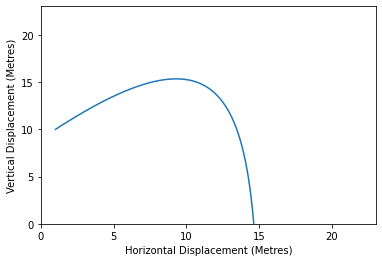

In [6]:

p2.plot_projectile_motion('Metres')

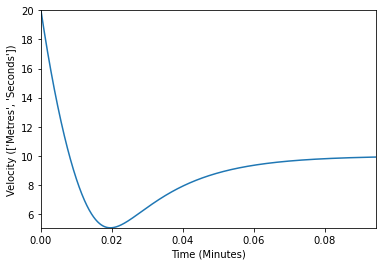

In [11]:
p1.plot_magnitude_of_velocity()

In [44]:
p1.get_y_displacement_at_t(0.5)

'9.172 Metres high at 0.5 Seconds'

In [12]:
min(p1.magnitude_of_vel)

15.000000000000004